<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/tabular_adult_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.tabular import *

In [10]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/adult_sample/models'),
 PosixPath('/root/.fastai/data/adult_sample/adult.csv'),
 PosixPath('/root/.fastai/data/adult_sample/export.pkl')]

In [0]:
df = pd.read_csv(path/'adult.csv')

In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [0]:
desired_value = 'salary'
cat_names = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'education']
cont_names = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
pre_processes = [FillMissing, Categorify, Normalize]

In [16]:
len(df['age'])

32561

In [0]:
data = (TabularList.from_df(df, cat_names = cat_names, cont_names = cont_names, procs = pre_processes)
      .split_by_idx(list(range(28000, 32560)))
      .label_from_df(cols = desired_value).databunch())

In [26]:
data.show_batch(2)

workclass,marital-status,occupation,relationship,race,sex,native-country,education,education-num_na,age,education-num,capital-gain,capital-loss,hours-per-week,target
Private,Never-married,Sales,Not-in-family,White,Female,United-States,HS-grad,False,-1.3661,-0.4228,-0.1453,-0.2185,3.5105,<50k
Private,Married-civ-spouse,Sales,Husband,White,Male,United-States,Some-college,False,-0.1953,-0.0303,-0.1453,-0.2185,0.2875,<50k


In [0]:
learn = tabular_learner(data, layers = [200, 100], metrics = accuracy)

In [28]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


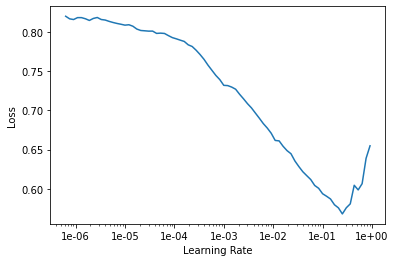

In [29]:
learn.recorder.plot()

In [0]:
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.336236,0.317834,0.848684,00:04


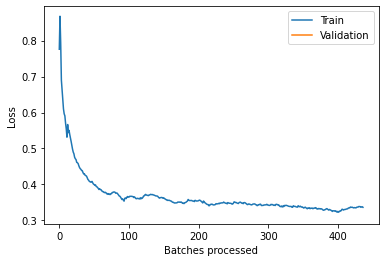

In [38]:
learn.load('stage-1')
learn.fit(1, slice(1e-02))
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time
0,0.341995,0.310451,0.852412,00:04
1,0.321473,0.316076,0.853728,00:04


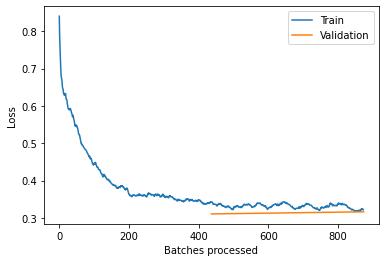

In [39]:
learn.load('stage-1')
learn.fit_one_cycle(2, slice(1e-02))
learn.recorder.plot_losses()
learn.save('stage-2')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


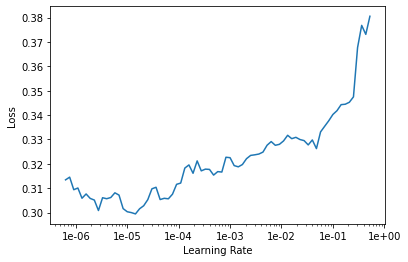

In [40]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('stage-3')

In [49]:
learn.load('stage-3')
lr = 1e-02
learn.fit_one_cycle(2, slice(lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.328974,0.312920,0.854167,00:04
1,0.318602,0.310328,0.857895,00:04


In [0]:
learn.save('stage-4')

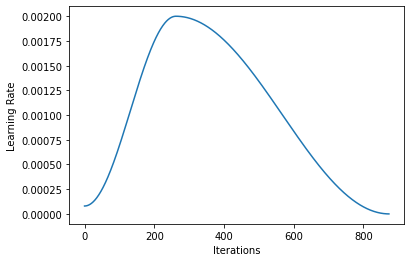

In [51]:
learn.recorder.plot_lr()

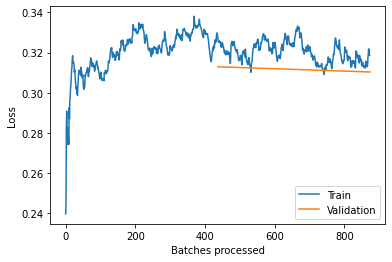

In [52]:
learn.recorder.plot_losses()